<a href="https://colab.research.google.com/github/mdaugherity/Numerical2024/blob/main/Week_9_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 351, Fall 2022**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ODE IVP = Euler's Method
Euler's Method is easy to implement but very slooooow to converge on the right answer.  Regardless, it is still a great starting point for undering how to solve ODE initial value problems.


Simple first order approximation:
Given derivatives $y'(t)=f(t,y)$ and initial values $y_0=y(0)$ then

$y(t+h) \approx y(t) + hf(t, y(t))$

# Manual Example
Let's run through a few points starting with a simple example problem:

Given $y'=y$ and $y(0)=1$ estimate y(t).  

The exact solution is $y(t)=e^t$.


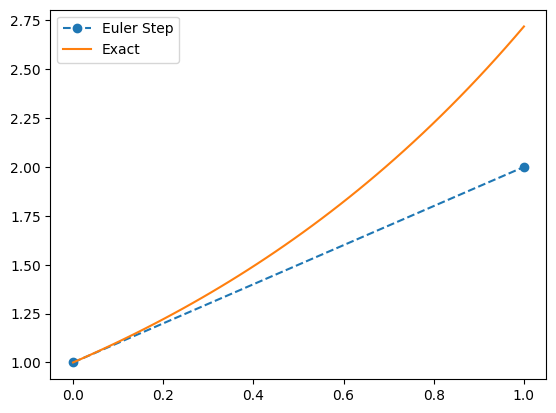

In [2]:
# Define derivative function
def f(t,y):
  return y

y0 = 1  # initial value
t0 = 0  # initial time
h = 1   # step size

y1 = y0 + h*f(t0,y0)  # one step

# Exact solution
t = np.linspace(0,1)
y_exact = np.exp(t)

plt.plot([t0,t0+h], [y0,y1], 'o--', label='Euler Step')
plt.plot(t, y_exact,label='Exact')
plt.legend()
plt.show()

Not so great.  Let's try multiple steps.

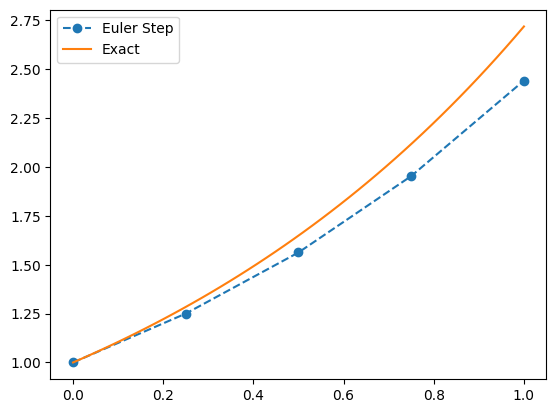

In [3]:
y0 = 1  # initial value
t0 = 0  # initial time
h = 0.25   # step size

t1 = t0+h
t2 = t1+h
t3 = t2+h
t4 = t3+h

y1 = y0 + h*f(t0,y0)
y2 = y1 + h*f(t1,y1)
y3 = y2 + h*f(t2,y2)
y4 = y3 + h*f(t3,y3)

# Exact solution
t = np.linspace(0,1)
y_exact = np.exp(t)

plt.plot([t0,t1,t2,t3,t4], [y0,y1,y2,y3,y4], 'o--', label='Euler Step')
plt.plot(t, y_exact,label='Exact')
plt.legend()
plt.show()

# Euler Function

Better.  Now make a proper function and do this in a loop.

In [4]:
# Euler's Method
def Euler(f, t, y0):
  '''Euler's Method: f = y' function, t=array of times, y0=initial value'''
  y = np.zeros_like(t)
  y[0] = y0
  for i in range(1,len(t)):
    h = t[i] - t[i-1]
    y[i] = y[i-1] + h*f(t[i-1],y[i-1])
  return y

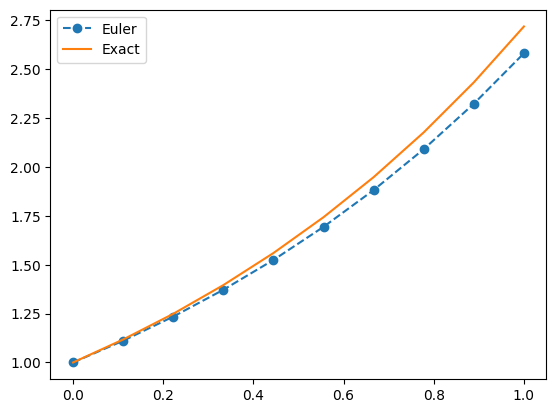

In [5]:
t = np.linspace(0,1,num=10)
y0 = 1
y = Euler(f, t, y0)

y_exact = y0*np.exp(t)

plt.plot(t, y, 'o--', label='Euler')
plt.plot(t, y_exact,label='Exact')

plt.legend()
plt.show()

# Error

See how error varies with step size.  How small does $h$ have to be?

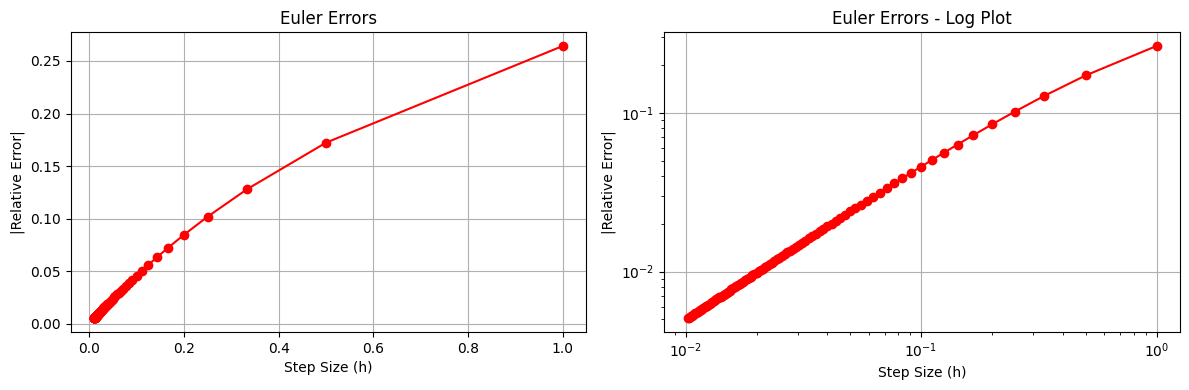

In [8]:
H = []  # list of step sizes
ERR = [] # list of errors

y_exact = np.exp(1)
for N in range(2,100):
  t = np.linspace(0,1, num=N)
  H.append(t[1]-t[0])  # step size
  y = Euler(f,t,y0)
  ERR.append(y[-1] - y_exact)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
#plt.plot(H,ERR,'ro-')
#plt.ylim(top=0)
plt.plot(H,np.abs(ERR)/y_exact,'ro-')
plt.xlabel('Step Size (h)')
plt.ylabel('|Relative Error|')
plt.title('Euler Errors')
plt.grid()

plt.subplot(1,2,2)
#plt.semilogx(H,ERR,'ro-')
#plt.ylim(top=0)
#plt.xlim(left=0.01)
plt.loglog(H,np.abs(ERR)/y_exact,'ro-')
plt.xlabel('Step Size (h)')
plt.ylabel('|Relative Error|')
plt.title('Euler Errors - Log Plot')
plt.grid()

plt.tight_layout()
plt.show()

Very slow to converge, so we need a very small step size to get errors under control.  Fortunately, we can use better methods...